# Работа с Excel

Материалы:

* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


In [1]:
import pandas as pd
import xlwings as xw
import numpy as np

C:\Users\berni\AppData\Local\Temp\ipykernel_2388\3538688595.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Разминка

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [7]:
# Шаг 1: Загрузка данных из файла reviews_sample.csv
reviews_df = pd.read_csv('reviews_sample.csv')

# Шаг 2: Загрузка данных из файла recipes_sample.csv с указанием столбца индекса
# Здесь предполагается, что столбец с индексами - это 'id'. 
recipes_df = pd.read_csv('recipes_sample.csv', index_col='id')

# Шаг 3: Оставляем только нужные столбцы в таблице с рецептами
selected_columns = ['name', 'minutes', 'submitted', 'description', 'n_ingredients']
recipes_df = recipes_df[selected_columns]

# Выводим результаты для проверки
print("Таблица с отзывами:")
print(reviews_df.head())
print("\nТаблица с рецептами (только выбранные столбцы):")
print(recipes_df.head())


Таблица с отзывами:
   Unnamed: 0     user_id  recipe_id        date  rating  \
0      370476       21752      57993  2003-05-01       5   
1      624300      431813     142201  2007-09-16       5   
2      187037      400708     252013  2008-01-10       4   
3      706134  2001852463     404716  2017-12-11       5   
4      312179       95810     129396  2008-03-14       5   

                                              review  
0  Last week whole sides of frozen salmon fillet ...  
1  So simple and so tasty!  I used a yellow capsi...  
2  Very nice breakfast HH, easy to make and yummy...  
3  These are a favorite for the holidays and so e...  
4  Excellent soup!  The tomato flavor is just gre...  

Таблица с рецептами (только выбранные столбцы):
                                           name  minutes   submitted  \
id                                                                     
44123     george s at the cove  black bean soup       90  2002-10-25   
67664        healthy for

2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [10]:
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv')

# Случайно выбираем 5% строк из каждой таблицы
sample_recipes = recipes.sample(frac=0.05, random_state=1)  # random_state для воспроизводимости
sample_reviews = reviews.sample(frac=0.05, random_state=1)

# Сохраняем в один файл Excel с двумя листами
with pd.ExcelWriter('recipes.xlsx') as writer:
    sample_recipes.to_excel(writer, sheet_name='Рецепты', index=False)
    sample_reviews.to_excel(writer, sheet_name='Отзывы', index=False)

print("Файл recipes.xlsx успешно создан!")


Файл recipes.xlsx успешно создан!


3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [11]:
# Открываем файл с помощью xlwings
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Рассчитываем время выполнения в секундах и добавляем новый столбец
# Предполагаем, что время выполнения в столбце 'minutes'
seconds_assign = (sample_recipes['minutes'] * 60).values

# Добавляем новый столбец в Excel начиная с колонки H (индекс 7)
sheet.range('I1').value = 'seconds_assign'  # Заголовок нового столбца

# Присваиваем значения в столбец H, начиная со строки 2
for i in range(len(seconds_assign)):
    sheet.range(f'I{i + 2}').value = seconds_assign[i]

# Сохраняем и закрываем файл
wb.save()
wb.close()

print("Столбец seconds_assign успешно добавлен на лист Рецепты.")

Столбец seconds_assign успешно добавлен на лист Рецепты.


4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [12]:
# Открываем файл с помощью xlwings
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Добавляем новый столбец 'seconds_formula' с формулой Excel
# Предполагаем, что время выполнения в столбце 'minutes' находится в колонке 'C'
# Добавим заголовок нового столбца в ячейку J1
sheet.range('J1').value = 'seconds_formula'

# Устанавливаем формулу для расчета времени выполнения в секундах
# Формула будет выглядеть как =C2*60, где C2 - это первая ячейка со временем выполнения в минутах
num_rows = sample_recipes.shape[0]  # Количество строк в выборке

# Устанавливаем формулу для всех строк (начиная со строки 2)
for i in range(num_rows):
    sheet.range(f'J{i + 2}').formula = f'=C{i + 2}*60'

# Сохраняем и закрываем файл
wb.save()
wb.close()

print("Столбец seconds_formula успешно добавлен на лист Рецепты.")

Столбец seconds_formula успешно добавлен на лист Рецепты.


5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [13]:
# Открываем файл с помощью xlwings
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Форматируем заголовки столбцов
header_range = sheet.range('I1:J1')  
header_range.font.bold = True  # Делаем текст полужирным
header_range.api.HorizontalAlignment = -4108  # Выравниваем по центру (xlHAlignCenter)

# Сохраняем и закрываем файл
wb.save()
wb.close()

print("Столбецы успешно полужирными и выровнены по центру ячейки.")


Столбецы успешно полужирными и выровнены по центру ячейки.


6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [17]:
# Открываем файл с помощью xlwings
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Получаем количество строк в столбце 'minutes'
num_rows = sheet.range('C' + str(sheet.cells.last_cell.row)).end('up').row  # Используем end('up') для нахождения последней заполненной ячейки

# Перебираем ячейки столбца minutes и задаем цвет фона
for i in range(2, num_rows + 1):  # Начинаем с 2, чтобы пропустить заголовок
    cell = sheet.range(f'C{i}')
    value = cell.value
    
    # Проверяем значение и устанавливаем цвет фона
    if isinstance(value, (int, float)):  # Убедимся, что значение числовое
        if value < 5:
            cell.color = (0, 255, 0)  # Зеленый
        elif 5 <= value <= 10:
            cell.color = (255, 255, 0)  # Желтый
        else:
            cell.color = (255, 0, 0)  # Красный

# Сохраняем и закрываем файл
wb.save()
wb.close()

print("Ячейки столбца minutes раскрашены в зависимости от времени выполнения.")


Ячейки столбца minutes раскрашены в зависимости от времени выполнения.


7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [26]:
from openpyxl import load_workbook

# Загрузка файла Excel
recipes_file = 'recipes.xlsx'

# Загружаем существующий файл Excel
wb = load_workbook(recipes_file)
sheet_recipes = wb['Рецепты']
sheet_reviews = wb['Отзывы']

# Добавляем заголовок нового столбца n_reviews
sheet_recipes['K1'] = 'n_reviews'  # Столбец n_reviews будет в колонке K

# Получаем количество строк в таблице рецептов
num_rows = sheet_recipes.max_row

# Заполняем новый столбец формулой COUNTIF
for row in range(2, num_rows + 1):  # Начинаем с 2, чтобы пропустить заголовок
    recipe_id = sheet_recipes[f'F{row}'].value  # recipe_id находится в столбце C
    # Формула COUNTIF для подсчета количества отзывов
    sheet_recipes[f'K{row}'] = f'=COUNTIF(Отзывы!F:F, {recipe_id})'

# Сохраняем изменения в файле Excel
wb.save(recipes_file)
wb.close()

print("Столбец n_reviews успешно добавлен на лист Рецепты.")


Столбец n_reviews успешно добавлен на лист Рецепты.


## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [28]:
from colorama import Fore, Style

# Загрузка файла Excel
recipes_file = 'recipes.xlsx'

def validate():
    # Загружаем данные из Excel файла
    df_reviews = pd.read_excel(recipes_file, sheet_name='Отзывы')  # Лист с отзывами
    df_recipes = pd.read_excel(recipes_file, sheet_name='Рецепты')  # Лист с рецептами

    # Получаем список всех id рецептов
    recipes_ids = df_recipes['id'].tolist()  # Предполагаем, что в столбце 'id' находятся идентификаторы рецептов

    # Проверяем отзывы
    for index, row in df_reviews.iterrows():
        user_id = row['user_id']  # Идентификатор пользователя
        recipe_id = row['recipe_id']  # Идентификатор рецепта
        date = row['date']  # Дата отзыва
        rating = row['rating']  # Рейтинг
        review_text = row['review']  # Текст отзыва

        # Проверяем условия
        if not (0 <= rating <= 5) or (recipe_id not in recipes_ids):
            print(Fore.RED + f"Ошибка в отзыве от пользователя {user_id}: {review_text} | Рейтинг: {rating}, Рецепт ID: {recipe_id}" + Style.RESET_ALL)
        else:
            print(f"Отзыв от пользователя {user_id}: {review_text} | Рейтинг: {rating}, Рецепт ID: {recipe_id}")

# Вызов функции
validate()


Ошибка в отзыве от пользователя 404573: These are great! Very simple to make and so good. I didn't have wings so I used chicken legs and I used garlic powder instead it still was very tasty. Thanks for sharing the recipe. My husband loved it. | Рейтинг: 5, Рецепт ID: 44888
Ошибка в отзыве от пользователя 240629: Once again, a great recipe from Evelyn!  Very quick and easy to prepare - my family of men LOVED it.  _x000D_
I know that if evelyn/athens posts a recipe, it will be wonderful!  Thanks for sharing! | Рейтинг: 5, Рецепт ID: 61816
Ошибка в отзыве от пользователя 474170: These are amazing. The fresh dill is a nice touch. I will be making them for Passover for myself instead of matzo balls. | Рейтинг: 5, Рецепт ID: 219041
Ошибка в отзыве от пользователя 431813: Very tasty and healthy dish.  This was really quick to put together, and the orange flavour really comes through.  Yum!  Thanks Mareesme! | Рейтинг: 5, Рецепт ID: 220709
Ошибка в отзыве от пользователя 110786: These were gre

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [2]:
import csv

# Чтение данных из CSV файла
with open('recipes_model.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    data = list(reader)  # Преобразуем данные в список

# Создание нового Excel файла
wb = xw.Book()  # Создаем новую книгу
sheet = wb.sheets[0]  # Получаем первый лист

# Переименовываем лист в "Модель"
sheet.name = 'Модель'

# Записываем данные, начиная с ячейки A2
sheet.range('A2').value = data

# Сохраняем файл как recipes_model.xlsx
wb.save('recipes_model.xlsx')

# Закрываем книгу
wb.close()



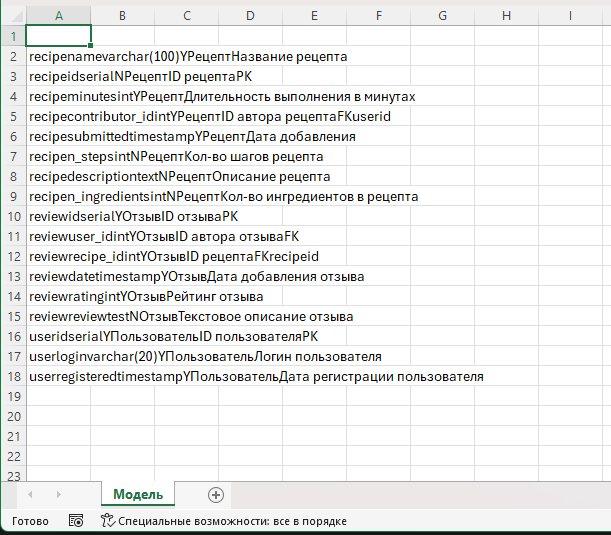

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [3]:
# Загрузка файла Excel
recipes_file = 'recipes_model.xlsx'
wb = xw.Book(recipes_file)
sheet = wb.sheets['Модель']

# Определяем диапазон данных
last_row = sheet.range('B' + str(sheet.cells.last_cell.row)).end('up').row

# Формула для столбца J
for row in range(2, last_row + 1):
    formula = f'''
    =TRIM(B{row} & " " & UPPER(C{row}) & 
    IF(G{row}="PK", " PRIMARY KEY", 
    IF(G{row}="FK", " REFERENCES " & H{row} & "(" & I{row} & ")", "")) & 
    IF(AND(E{row}="Y", G{row}<>"PK"), " NOT NULL", ""))
    '''
    sheet.range(f'J{row}').formula = formula

# Сохранение файла и закрытие
wb.save()
wb.close()



11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
# Загрузка файла Excel
recipes_file = 'recipes_model.xlsx'
wb = xw.Book(recipes_file)
sheet = wb.sheets['Модель']  # Открываем лист "Модель"

# Установка цвета заливки для заголовков
header_range = sheet.range('A2').expand('right')  # Заголовки находятся в первой строке
header_range.color = (0, 204, 255)  # Устанавливаем цвет заливки (RGB)

# Применение автоподбора ширины столбца
sheet.autofit()

# Установка полужирного шрифта для заголовков
header_range.font.bold = True

# Добавление автофильтра
sheet.api.AutoFilterMode = False  # Сначала отключаем автофильтр, если он включен
header_range.api.AutoFilter()  # Включаем автофильтр

# Сохранение файла и закрытие
wb.save()
wb.close()


12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 